# Analiza glavnih komponenti i klasifikacija

Analiza glavnih komponenti se može iskoristiti za redukciju dimenzionalnosti podataka sa kojima rade algoritmi mašinskog učenja. Nadalje sledi jedan takav primer klasifikacije MNIST sličica.

In [29]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.random.seed(7)

Prvo ćemo učitati skupove podataka korišćenjem podrške Keras biblioteke.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Podsetimo se da su MNIST sličice dimenzija 28x28 piksela u crno-belom modu.

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
image_width = 28
image_height = 28

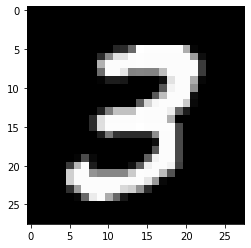

In [8]:
plt.imshow(X_train[7], cmap='gray')
plt.show()

Za treniranje modela ćemo iskoristiti samo prvih 20000 slika. 

In [9]:
number_of_images = 20000

In [10]:
X_train = X_train[:number_of_images]
y_train = y_train[:number_of_images]

Slike ćemo pre klasifikacije pripremiti za rad tako što ćemo ih *ispraviti* tj. sa 2D matrice vrednosti svesti na 1D niz vrednosti piksela, a potom i normalizovati. 

In [11]:
X_train = X_train.reshape(-1, image_width*image_height).astype('float32')
X_train /= 255.

In [12]:
X_train.shape

(20000, 784)

In [13]:
X_test = X_test.reshape(-1, image_width*image_height).astype('float32')
X_test /= 255.

In [14]:
X_test.shape

(10000, 784)

Dalje ćemo slike svesti na vektore dimenzije 30 korišćenjem analize glavnih komponenti.

In [15]:
pca = PCA(n_components=30)

In [16]:
pca.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_train_pca = pca.transform(X_train)

In [18]:
X_train_pca.shape

(20000, 30)

In [19]:
X_test_pca = pca.transform(X_test)

In [20]:
X_test_pca.shape

(10000, 30)

Za klasifikaciju slika iskoristićemo logističku regresiju. Pošto je u pitanju višeklasna klasifikacija, postavićemo i vrednost `multi_class` parametra tako da se koristi `jedan protiv svih` tehnika. 

In [21]:
model = LogisticRegression(max_iter=400, multi_class='ovr')

In [22]:
model.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Dalje slede ocene ovog klasifikatora na skupu za treniranje i testiranje.

In [23]:
model.score(X_train_pca, y_train)

0.881

In [24]:
model.score(X_test_pca, y_test)

0.8857

Ukoliko bi isti model učili nad punim reprezentacijama vektora, dobili bismo nešto bolje rezultate. 

In [25]:
model_full = LogisticRegression(max_iter=600, multi_class='ovr')

In [26]:
model_full.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model_full.score(X_train, y_train)

0.9403

In [28]:
model_full.score(X_test, y_test)

0.911

Model koji koristi 30 atributa na test skupu ima ocenu 0.8857, dok model koji koristi svih 784 atributa ima ocenu 0.911.

<div class='alert alert-info'>
Zadaci za vežbu:

1. Koliki udeo varijanse se objašnjava izborom 30 glavnih komponenti?
2. Koliko glavnih komponenti treba odabrati da bi se objasnilo barem 85% varijanse polaznog skupa?
</div>